In [1]:
def nat_read_xlsx(xrow,xcol1,xcol2):
    import xlrd
    file = 'One_box_model_Lan_C165.xlsx'
    wb=xlrd.open_workbook(file)
    sheet=wb.sheet_by_index(0)
    data=[]
    for i in range (xcol1,xcol2):
        data.append(sheet.cell_value(xrow,i))
    return data

In [26]:
import numpy 
import math
from matplotlib import pyplot, axes 
from scipy import stats

In [32]:
#reading data from box model spreadsheet
year=nat_read_xlsx(0,4,37)
Qtot_data=nat_read_xlsx(32,4,37)
Qff_data=nat_read_xlsx(19,4,37)
Qmic_data=nat_read_xlsx(34,4,37)
Qbb_data=nat_read_xlsx(31,4,37)
Qsoil_data=nat_read_xlsx(33,4,37)
del_13Cff_data=nat_read_xlsx(28,4,37)
del_13Cmic_data=nat_read_xlsx(27,4,37)
del_13Ctot_data=nat_read_xlsx(25,4,37)
del_13Cbb_data=nat_read_xlsx(29,4,37)
nyrs=33

Text(0.5, 1.0, 'Methane Burden from 1984 to 2016')

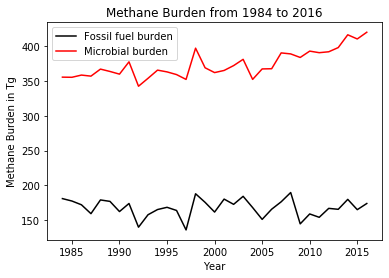

In [41]:
def fossil_fuel_burden(Qtot,Qmic,Qbb,Qsoil,del_13Cff,del_13Cmic,del_13Ctot,del_13Cbb):
    Qff=1./(del_13Cff-del_13Cmic)*(del_13Ctot*(Qtot-Qsoil)-del_13Cmic*(Qtot-Qbb-Qsoil)-del_13Cbb*(Qbb))
    return Qff

def microbial_burden(Qtot,Qff,Qbb,Qsoil,del_13Cff,del_13Cmic,del_13Ctot,del_13Cbb):
    Qmic=1./(del_13Cmic-del_13Cff)*(del_13Ctot*(Qtot-Qsoil)-del_13Cff*(Qtot-Qbb-Qsoil)-del_13Cbb*(Qbb))
    return Qmic

Qtot=numpy.zeros(nyrs)
for i in range(nyrs):
    Qtot[i]=Qtot_data[i]
    
Qff=numpy.zeros(nyrs)
for i in range(nyrs):
    Qff[i]=Qff_data[i]

Qmic=numpy.zeros(nyrs)
for i in range(nyrs):
    Qmic[i]=Qmic_data[i]

Qbb=numpy.zeros(nyrs)
for i in range(nyrs):
    Qbb[i]=Qbb_data[i]
    
Qsoil=numpy.zeros(nyrs)
for i in range(nyrs):
    Qsoil[i]=Qsoil_data[i]

del_13Cff=numpy.zeros(nyrs)
for i in range(nyrs):
    del_13Cff[i]=del_13Cff_data[i]
    
del_13Cmic=numpy.zeros(nyrs)
for i in range(nyrs):
    del_13Cmic[i]=del_13Cmic_data[i]
    
del_13Ctot=numpy.zeros(nyrs)
for i in range(nyrs):
    del_13Ctot[i]=del_13Ctot_data[i]
    
del_13Cbb=numpy.zeros(nyrs)
for i in range(nyrs):
    del_13Cbb[i]=del_13Cbb_data[i]


pyplot.plot(year,Qff,color='black') 
#pyplot.plot(year,Qff_data,color=green)
pyplot.plot(year,Qmic,color='red')
#pyplot.plot(year,Qmic_data,color='purple')
pyplot.legend(["Fossil fuel burden","Microbial burden"])
pyplot.xlabel("Year")
pyplot.ylabel("Methane Burden in Tg")
pyplot.title("Methane Burden from 1984 to 2016")

In [ ]:
#assumptions/questions: Qbb=Qbmb? Qsoil=soil sink? Delmic=Delbact?
#deltotal=delq? which one?